# XGBOOST Regression model

## Import of libraries 

In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import ipywidgets as widgets


## Loading the dataset 

In [121]:
# Load the entire dataset (replace 'data.csv' with the correct path to your dataset file)
filepath = 'C:/Users/42073/Desktop/_Python/Datasety/Housing.csv'
df = pd.read_csv(filepath)

In [122]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


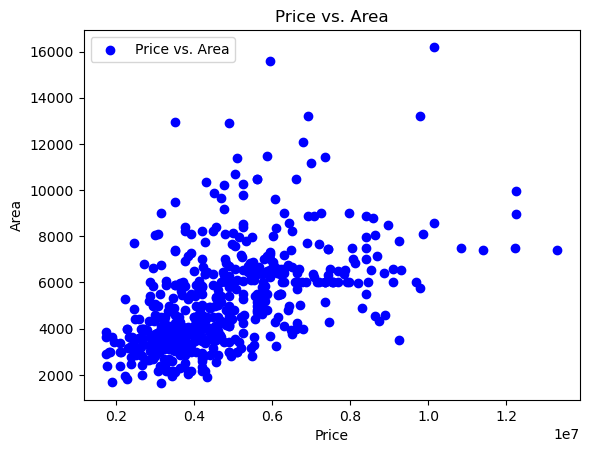

In [123]:
plt.scatter(df['price'], df['area'], color='blue', label='Price vs. Area')
plt.xlabel("Price")
plt.ylabel("Area")
plt.title("Price vs. Area")
plt.legend()

plt.show()

## Label encoding 

In [124]:
label_encoder = LabelEncoder()
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
encoded_labels = {}
for column in categorical_columns:
    encoded_labels[column] = dict(zip(label_encoder.fit(df[column]).classes_, label_encoder.transform(label_encoder.fit(df[column]).classes_)))
    df[column] = label_encoder.transform(df[column])

    
    
    print("Encoded Labels:")
for column, labels in encoded_labels.items():
    print(f"{column}: {labels}")


Encoded Labels:
Encoded Labels:
Encoded Labels:
Encoded Labels:
Encoded Labels:
Encoded Labels:
Encoded Labels:
mainroad: {'no': 0, 'yes': 1}
guestroom: {'no': 0, 'yes': 1}
basement: {'no': 0, 'yes': 1}
hotwaterheating: {'no': 0, 'yes': 1}
airconditioning: {'no': 0, 'yes': 1}
prefarea: {'no': 0, 'yes': 1}
furnishingstatus: {'furnished': 0, 'semi-furnished': 1, 'unfurnished': 2}


## Deciding what model should predict and learn on 

In [125]:
# Extract features (independent variables) and target (dependent variable)
X = df.drop(columns=['price'])
y = df['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Choosing the model 

In [126]:
model = xgb.XGBRegressor()


## Parametrization


</text> param_grid: It's a dictionary that defines the hyperparameter grid to search over during the grid search. Hyperparameters are model parameters that are set before training and can significantly impact the model's performance. In this case, the grid specifies the values to try for two hyperparameters: n_estimators (number of boosting rounds) and learning_rate (step size shrinkage).

GridSearchCV: It's a class from scikit-learn used for hyperparameter tuning using grid search. It performs an exhaustive search over the hyperparameter grid specified in param_grid. For each combination of hyperparameters, it uses cross-validation (specified by cv) to evaluate the model's performance.

cv: It's the number of cross-validation folds used during grid search. In this case, cv=10, so it performs 10-fold cross-validation, meaning it splits the data into 10 subsets, trains the model on 9 of them, and validates on the remaining one.

scoring: It's the evaluation metric used to compare different hyperparameter combinations. In this case, scoring='neg_mean_squared_error', which means it will use the negative mean squared error (MSE) as the evaluation metric. By default, scikit-learn optimizes for higher values of the scoring metric, so using negative MSE allows it to minimize the mean squared error.

grid_search.fit(X_train_scaled, y_train): It performs the grid search with cross-validation using the training data (X_train_scaled and y_train). The best hyperparameters are determined based on the results of the cross-validation.

grid_search.best_params_: After the grid search is completed, this attribute gives the best hyperparameters found during the search.

grid_search.best_estimator_: It provides the best model obtained with the best hyperparameters found during grid search.

best_model.fit(X_train_scaled, y_train): It trains the best model on the entire training set using the best hyperparameters. </end>


In [127]:
#Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train the best model on the entire training set
best_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

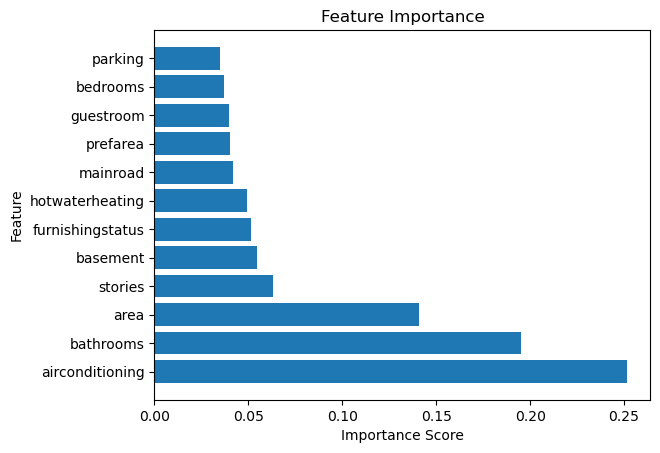

In [128]:
importance_scores = best_model.feature_importances_

# Create a DataFrame to associate feature names with their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize the feature importance scores
import matplotlib.pyplot as plt
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [129]:
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)

## Evaluation of the model

In [130]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Mean Squared Error: {mse}")

Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 50}
Mean Squared Error: 1837786259384.883


## Graphical Visulisation of model´s performancy 

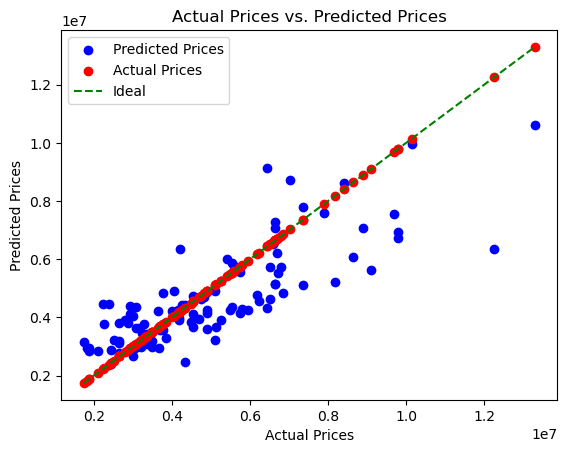

In [131]:
# Visualize the predicted prices vs. actual prices with different colors
plt.scatter(y_test, y_pred, color='blue', label='Predicted Prices')
plt.scatter(y_test, y_test, color='red', label='Actual Prices')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.legend()

# Add diagonal line for the ideal relationship
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', linestyle='--', label='Ideal')
plt.legend()

plt.show()

## Input box for the manually written parameters 

In [132]:
def predict_price(area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus):
    input_data = pd.DataFrame({
        'area': [area],
        'bedrooms': [bedrooms],
        'bathrooms': [bathrooms],
        'stories': [stories],
        'mainroad': [mainroad],
        'guestroom': [guestroom],
        'basement': [basement],
        'hotwaterheating': [hotwaterheating],
        'airconditioning': [airconditioning],
        'parking': [parking],
        'prefarea': [prefarea],
        'furnishingstatus': [furnishingstatus]
    })

    # Perform label encoding for the categorical columns
    input_data['mainroad'] = input_data['mainroad'].map({'yes': 1, 'no': 0})
    input_data['guestroom'] = input_data['guestroom'].map({'yes': 1, 'no': 0})
    input_data['basement'] = input_data['basement'].map({'yes': 1, 'no': 0})
    input_data['hotwaterheating'] = input_data['hotwaterheating'].map({'yes': 1, 'no': 0})
    input_data['airconditioning'] = input_data['airconditioning'].map({'yes': 1, 'no': 0})
    input_data['prefarea'] = input_data['prefarea'].map({'yes': 1, 'no': 0})

    furnishing_mapping = {'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2}
    input_data['furnishingstatus'] = input_data['furnishingstatus'].map(furnishing_mapping)

    # Normalize the features using StandardScaler
    input_scaled = scaler.transform(input_data)

    # Predict the price
    predicted_price = best_model.predict(input_scaled)[0]
    return predicted_price

# Create input widgets for each feature
area_input = widgets.FloatText(description='Area:')
bedrooms_input = widgets.IntText(description='Bedrooms:')
bathrooms_input = widgets.IntText(description='Bathrooms:')
stories_input = widgets.IntText(description='Stories:')
mainroad_input = widgets.Dropdown(options=['yes', 'no'], description='Main Road:')
guestroom_input = widgets.Dropdown(options=['yes', 'no'], description='Guest Room:')
basement_input = widgets.Dropdown(options=['yes', 'no'], description='Basement:')
hotwaterheating_input = widgets.Dropdown(options=['yes', 'no'], description='Hot Water Heating:')
airconditioning_input = widgets.Dropdown(options=['yes', 'no'], description='Air Conditioning:')
parking_input = widgets.IntText(description='Parking:')
prefarea_input = widgets.Dropdown(options=['yes', 'no'], description='Pref Area:')
furnishingstatus_input = widgets.Dropdown(options=['unfurnished', 'semi-furnished', 'furnished'], description='Furnishing Status:')

# Create an interactive widget using the predict_price function
interactive_widget = widgets.interactive(predict_price,
                                         area=area_input,
                                         bedrooms=bedrooms_input,
                                         bathrooms=bathrooms_input,
                                         stories=stories_input,
                                         mainroad=mainroad_input,
                                         guestroom=guestroom_input,
                                         basement=basement_input,
                                         hotwaterheating=hotwaterheating_input,
                                         airconditioning=airconditioning_input,
                                         parking=parking_input,
                                         prefarea=prefarea_input,
                                         furnishingstatus=furnishingstatus_input)

# Display the interactive widget
display(interactive_widget)


interactive(children=(FloatText(value=0.0, description='Area:'), IntText(value=0, description='Bedrooms:'), In…

# Model prediction based off inputs


### everytime you change the input run the cell below to see the result!

In [136]:
predicted_price = interactive_widget.result
print(f'Predicted Price: {predicted_price:.2f}')

Predicted Price: 3923501.75
